In [ ]:
import pandas as pd
import joblib  # For saving and loading models

# Load predictions, test features and labels
y_pred_final = pd.read_csv("y_pred_final.csv").squeeze()  # Load predictions as Series
X_test = pd.read_csv("X_test.csv")  # Load test features
y_test = pd.read_csv("y_test.csv").squeeze()  # Load test labels as Series

# Load trained model
model = joblib.load("stacking_model.pkl")  # Load saved stacking model


In [ ]:
from sklearn.metrics import classification_report

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_final))  # Print detailed classification metrics (precision, recall, f1-score)



📋 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       374
           1       0.77      0.78      0.78       374

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



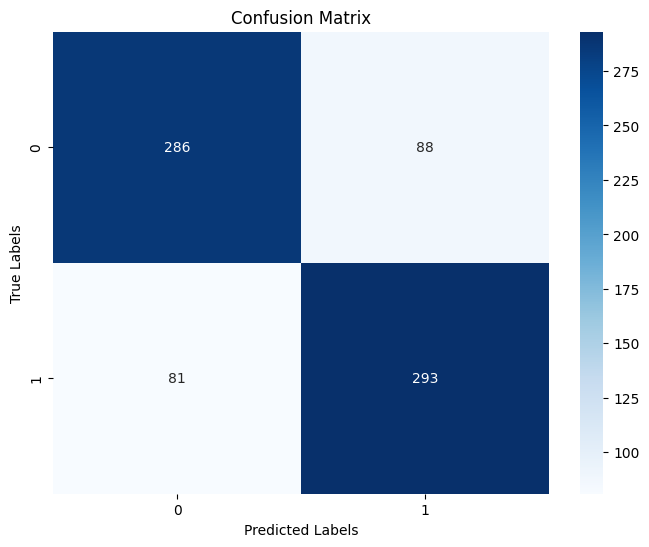

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Plot confusion matrix as heatmap for clear visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')  # X-axis: predictions
plt.ylabel('True Labels')       # Y-axis: actual values
plt.title('Confusion Matrix')   # Title for clarity
plt.show()


### Evaluating with setting threshold

✅ Best Threshold: 0.367
📈 Best F1 Score: 0.801


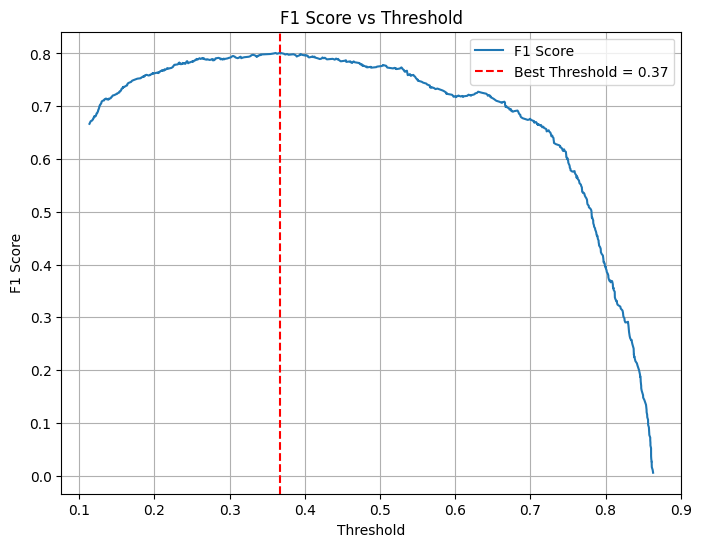

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (class 1)
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall and thresholds for different cutoff values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Add small epsilon to avoid zero division

# Find the best threshold that maximizes F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"✅ Best Threshold: {best_threshold:.3f}")
print(f"📈 Best F1 Score: {best_f1:.3f}")

# Plot F1 score versus threshold to visualize the trade-off
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')  # f1_scores has one more element, ignore last for threshold
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


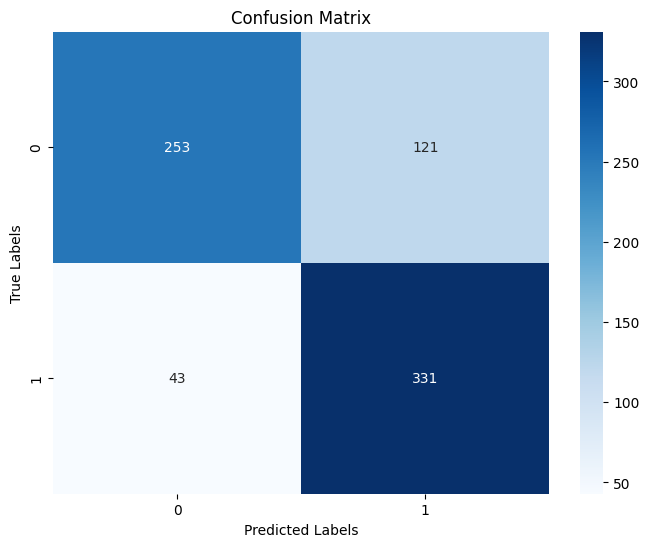

In [17]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       374
           1       0.73      0.89      0.80       374

    accuracy                           0.78       748
   macro avg       0.79      0.78      0.78       748
weighted avg       0.79      0.78      0.78       748

